<a href="https://colab.research.google.com/github/reganmeloche/ML-from-scratch/blob/main/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

This notebook walks through the underlying process of a decision tree, one of the most basic supervised machine learning classifiers. Our goal is to use historical data to predict an outcome.



A tree is composed of nodes, and those nodes are chosen by looking for the optimum split of features, which is calculated using the principle of information gain.  The two main mechanisms for decision tree splits that we look at are the Gini index and entropy.

Sources:
- https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
- https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8
- https://towardsdatascience.com/entropy-and-information-gain-in-decision-trees-c7db67a3a293
- https://quantdare.com/decision-trees-gini-vs-entropy/
- Grokking Artificial Intelligence Algorithms - Rishal Hurbans
- Machine Learning - Peter Flach




## Calculators

A split is determined using the concept of information gain - the amount of information gained by asking a specific yes/no question. If a lot of information is gained, then the uncertainty is smaller, making a prediction easier

General process: 
- Split the dataset by asking a question
- Calculate gini/entropy for the left split
- Get the weighted average for the left split
- Calculate gini/entropy for the right split
- Get the weighted average for the right split
- Sum them together to get the final amount
- Do this on all possible splits, and choose the one with the lowest value (i.e. the one that maximizes information gain)

In [ ]:
# Basic Imports
import pandas as pd
import numpy as np
import math

### Gini index

The gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.

The minimum value of the Gini Index is 0. This happens when the node is pure, this means that all the contained elements in the node are of one unique class. Therefore, this node will not be split again. Thus, the optimum split is chosen by the features with less Gini Index. Moreover, it gets the maximum value (0.5) when the probability of the two classes are the same.


$$ Gini = 1 - \sum_{i=1}^{C} p_i^2 $$ 

Where $p_i$ is the probability of an object being classified in class i.


In [ ]:
class GiniCalculator:
    # This function assumes we have already split some data into separate groups. 
    # We are evaluating the gini index of each group and then adding them together to get the weighted sum for the entire split
    def calculate(self, groups, classes):
        total_size = sum([len(group) for group in groups])
    
        # sum weighted Gini index for each group
        weighted_sum = 0.0
        for group in groups:
            group_size = len(group)

            # avoid divide by zero
            if group_size == 0:
                continue

            sum_p2 = 0.0
            # score the group based on the score for each class
            for class_val in classes:
                y_vals = [row[-1] for row in group]
                p = y_vals.count(class_val) / group_size
                sum_p2 += p * p

            # weight the group score by its relative size
            gini_index = 1.0 - sum_p2
            weighted_sum += gini_index * (group_size / total_size)

        return round(weighted_sum, 2)

### Entropy

Generally speaking, entropy is a measure of disorder. We use it here to measure how "mixed" a column is. It indicates the disorder of the features with the target.

$$ Entropy = \sum_{i=1}^{C} -p_i \cdot \log_k{p_i} $$

Where k is usually 2, and $p_i$ is the probability of class i

Suppose we have 2 classes and 10 data points. Class A has 7 instances, and B has 3:
- Entropy = - 0.3 * log2(0.3) - 0.7 * log2(0.7) = 0.88

This is considered high. Entropy can be higher than 1 - can use different logs with different number of classes, but its all just a measure of disorder or uncertainty, and the goal is to reduce uncertainty.

It gets its maximum value when the probability of the two classes is the same and a node is pure when the entropy has its minimum value, which is 0.


In information theory, a bit is thought of as a binary number representing 0 for no information and 1 for a full bit of information. We can represent a bit of information as a binary number because it either has the value (1) or (0). Suppose there’s an equal probability of it raining tomorrow (1) or not raining(0). If I tell you that it will rain tomorrow, I’ve given you one bit of information.


In [ ]:
class EntropyCalculator:
    def calculate(self, groups, classes):
        total_size = sum([len(group) for group in groups])
        logk = math.log(len(classes))

        weighted_sum = 0.0
        for group in groups:
            group_size = len(group)
            # avoid divide by zero
            if group_size == 0:
                continue

            summations = 0.0
            for class_val in classes:
                y_vals = [row[-1] for row in group]
                p = y_vals.count(class_val) / group_size
                if p > 0 and logk > 0:
                    next_calc = -p * (math.log(p)/logk)
                    summations += next_calc

            weighted_sum += summations * (group_size / total_size)
        
        return round(weighted_sum, 2)

In [ ]:
g = [
    [
        [0,0], [0,0], [0,0], [0,1], [0,1], [0,1], [0,1], [0,1], [0,1], [0,1]
    ]
]

en = EntropyCalculator()
en.calculate(g, [0,1])

0.88

### Comparison

In [ ]:
# Note: Only the final values matter (1, 0, 2) (1,0) (2)

#  Perfectly balanced (bad split) => 0.5
test_groups1 = [
    [
        [0,0,0,1],
        [0,0,0,0],
        [0,0,0,2],
    ],
    [
        [0,0,0,1],
        [0,0,0,0],
    ],
    [
        [0,0,0,2]
    ]
]

# Perfectly split => 0
test_groups2 = [
    [
        [0,0,0,0],
        [0,0,0,0],
        [0,0,0,0],
    ],
    [
        [0,0,0,1],
        [0,0,0,1],
    ],
    [
        [0,0,0,2]
    ]
]

# Ok
test_groups3 = [
    [
        [0,0,0,0],
        [0,0,0,1],
        [0,0,0,1],
    ],
    [
        [0,0,0,0],
        [0,0,0,0],
    ],
    [
        [0,0,0,2]
    ]
]

classes = [0, 1, 2]

gc = GiniCalculator()
g1 = gc.calculate(test_groups1, classes)
g2 = gc.calculate(test_groups2, classes)
g3 = gc.calculate(test_groups3, classes)

ec = EntropyCalculator()
e1 = ec.calculate(test_groups1, classes)
e2 = ec.calculate(test_groups2, classes)
e3 = ec.calculate(test_groups3, classes)

print('GINI', g1, g2, g3)
print('Entropy', e1, e2, e3)


GINI 0.5 0.0 0.22
Entropy 0.71 0.0 0.29


## Decision Tree Class

To build a binary decision tree, we need to recursively split into two nodes. As we build the tree and choose columns to split on, we no longer need those columns.

We have two parameters to control when we stop splitting:
- Max tree depth: Maximum number of nodes from the root. Once this is hit, we stop adding new nodes. If the tree gets too deep, then might overfit
- Minimum node records: Minimum number of training patterns that a given node is responsible for.


In [ ]:
class MyDecisionTree():
    def __init__(self, max_depth=2, min_size=1, criterion='gini'):
        self.__root = None
        self.__max_depth = max_depth
        self.__min_size = min_size
        if criterion == 'entropy':
            self.__calculator = EntropyCalculator()
        elif criterion =='gini':
            self.__calculator = GiniCalculator()
        else:
            raise Exception('Invalid criterion')
    
    def fit(self, X, y):
        dataset = np.concatenate((X, np.transpose([y])), axis=1)
        root = self._get_split(dataset)
        self._split(root, self.__max_depth, self.__min_size, 1)
        self.__root = root

    # This evaluates all possible numeric splits - exhaustive and greedy
    # Could do alternate ways - e.g. pick a random value or choose a sample of data
    def _get_split(self, dataset):
        class_values = list(set(row[-1] for row in dataset))
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        
        # Iterate over columns
        for index in range(len(dataset[0])-1):
        
            # Iterate over rows. Greedy and exhaustive. Could change this to just choose random values
            # Only handles numeric data. Could also adjust to handle categorical data
            for row in dataset:
                groups = self._test_split(index, row[index], dataset)
                meas = self.__calculator.calculate(groups, class_values)
    
                if meas < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], meas, groups
        
        return {'index':b_index, 'value':b_value, 'groups':b_groups}


    # Create child splits for a node or make terminal
    def _split(self, node, max_depth, min_size, depth):
        # Reset
        left, right = node['groups']
        del(node['groups'])
        
        # check for a no split
        if not left or not right:
            node['left'] = node['right'] = self._to_terminal(left + right)
            return
        
        # check for max depth
        if depth >= max_depth:
            node['left'], node['right'] = self._to_terminal(left), self._to_terminal(right)
            return
        
        # process left child
        if len(left) <= min_size:
            node['left'] = self._to_terminal(left)
        else:
            node['left'] = self._get_split(left)
            self._split(node['left'], max_depth, min_size, depth+1)
        
        # process right child
        if len(right) <= min_size:
            node['right'] = self._to_terminal(right)
        else:
            node['right'] = self._get_split(right)
            self._split(node['right'], max_depth, min_size, depth+1)
        
    # Split a dataset based on an attribute and an attribute value
    # This only works for numeric values and is only binary
    # TODO: add categorical feature handling
    def _test_split(self, index, value, dataset):
        left, right = list(), list()
        for row in dataset:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)
        return left, right

    def _to_terminal(self, group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)
    

    # Print a decision tree
    def print_tree(self):
        self._inner_print_tree(self.__root)

    def _inner_print_tree(self, node, depth=0):
        if isinstance(node, dict):
            print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
            self._inner_print_tree(node['left'], depth+1)
            self._inner_print_tree(node['right'], depth+1)
        else:
            print('%s[%s]' % ((depth*' ', node)))

    
    def predict(self, X):
        fake_y =  np.zeros(len(X))
        new_x = np.concatenate((X, np.transpose([fake_y])), axis = 1)

        preds = []
        for x in new_x:
            next_pred = self._predict(self.__root, x)
            preds.append(next_pred)
        
        return preds


    def _predict(self, node, row):
        if row[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self._predict(node['left'], row)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self._predict(node['right'], row)
            else:
                return node['right']

### Test Execution

In [ ]:
dataset = [[2.771244718,1.784783929,0],
	[1.728571309,1.169761413,0],
	[3.678319846,2.81281357,0],
	[3.961043357,2.61995032,0],
	[2.999208922,2.209014212,0],
	[7.497545867,3.162953546,1],
	[9.00220326,3.339047188,1],
	[7.444542326,0.476683375,1],
	[10.12493903,3.234550982,1],
	[6.642287351,3.319983761,1]]

X = [r[:-1] for r in dataset]
y = [r[-1] for r in dataset]


In [ ]:
dt = MyDecisionTree(max_depth = 3, min_size=1, criterion='gini')

dt.fit(X,y)

dt.print_tree()


[X1 < 6.642]
 [X1 < 2.771]
  [0.0]
  [X1 < 2.771]
   [0.0]
   [0.0]
 [X1 < 7.498]
  [X1 < 7.445]
   [1.0]
   [1.0]
  [X1 < 7.498]
   [1.0]
   [1.0]


In [ ]:
test_val = [1.2, 2.1]
preds = dt.predict([test_val])

print(preds)

[0.0]


## Evaluation and Comparison

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
X = df.loc[:, df.columns != 'target'].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
my_dt = MyDecisionTree(max_depth=4, min_size=1, criterion='gini')

my_dt.fit(X_train, y_train)

preds = my_dt.predict(X_test)

print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        18
         1.0       1.00      0.91      0.95        11
         2.0       1.00      1.00      1.00         9

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=2)
dt.fit(X,y)

preds2 = dt.predict(X_test)
print(metrics.classification_report(y_test, preds2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       0.92      1.00      0.96        11
         2.0       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.97      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

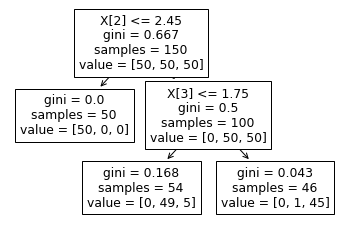

In [ ]:
from sklearn import tree
tree.plot_tree(dt)